 PROBLEM STATEMENT: As more online users move from desktop to mobile, it's become increasely important that 
established internet giants like Google and Facebook, who have built their enterprises on online ad revenue learn to
make mobile ad revenue just as profitable as traditional desktop. Online ad revenue is a function of cost per a click (CPC)and click through rate (CTR). Cost per a click is the amount of money an advertiser is willing to pay per a user click. Click through rate is a user's propensity to click on an ad. This project tries to answer the question of what drives mobile CTR, a binary event. Based on various environmental factors (site, app, device type), will the ad be clicked or not?

A formula to better understand the relationship between CTR and CPC: 

                            CPM = 1000 × CTR × CPC 

CPM stands for cost per 1000 impressions. CPM is the core metric used to allow both sell and buy-side players to look at costs(advertisers)/earnings(publishers) across campaigns paid on a per click basis or a per impression basis. Adveristers can choose to pay on a cost per a click (CPC) or a cost per a 1000 impressions (CPM). Traditionally advertisers trying to promote brand awareness will pay on a CPM basis and advertisers looking for a user to take an action (purchase, sign-up, etc.) will pay on a CPC basis. 
 
 
HYPOTHESIS: I would expect the position of the ad will be the greatest influencer of CTR. 

DOMAIN KNOWLEDGE: I previously worked in this space for 4 years and worked to optimize ad size, placement, and ad server settings to increase publishers' revenue. At the time I left the industry (2014) there was hightened concern on solving the mobile problem as advertisers were not willing to pay as much for mobile advertising (declining CPC) because of the platform's lower conversion rates. Since 2014, my understanding is CPCs have continued to fall but industry giants have continued to increase annual revenues because of their gains in CTR. This projects aims to answer the question of where the greatest gains can be found in mobile CTR. 

DATA SOURCE: This data set is taken from a Kaggle competition offered by Avazu data. There are more than 40 million rows and 24 different columns or variables available in the training data set. There is a also a test data set to test any predictive model. A few of the notable variables included are time of day the ad is clicked, device information, as well as if the ad was in an app or website environment. The dependent variable, if the user clicked the ad, is tracked in column "click." A click is denoted by a "1" and a non-click is denoted by a "0". 

GOAL: Determine the key variables that determine if a mobile ad will be clicked. I'd like to use this knowledge to speak intelligently from quantitative data on what drives mobile ad CTR. Although I'm not currently working in this space, I am entertaining the possiblity of returning to the industry.

PROJECT CONCERNS: From experience I know ad size is a huge indicator if an ad is clicked. I'm unclear if this data set provides that information or also importantly, what's the ad's format (video, text, etc)?

EXPLORATORY ANALYSIS & CLEANING THE DATA...


In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 25)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn import feature_selection, tree, ensemble, externals, linear_model, cross_validation, preprocessing, decomposition, metrics, cluster,model_selection


/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
df = pd.read_csv('/Users/lsergio/DS-SF-34/final-project/datasets/train_1.gz', compression='gzip', header=0, sep=',', quotechar='"')



In [3]:
df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
5,10000720757801103869,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,05241af0,8a4875bd,1,0,16920,320,50,1899,0,431,100077,117
6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,b264c159,be6db1d7,1,0,20362,320,50,2333,0,39,-1,157
7,10000918755742328737,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e6f67278,be74e6fe,1,0,20632,320,50,2374,3,39,-1,23
8,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,37e8da74,5db079b5,1,2,15707,320,50,1722,0,35,-1,79
9,10001264480619467364,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,c357dbff,f1ac7184,373ecbe6,0,0,21689,320,50,2496,3,167,100191,23


In [91]:
df.shape


(40428967, 24)

In [92]:
df.isnull().sum().sum()

0

In [121]:
for column in df.columns:
    print column

id
click
hour
C1
banner_pos
site_id
site_domain
site_category
app_id
app_domain
app_category
device_id
device_ip
device_model
device_type
device_conn_type
C14
C15
C16
C17
C18
C19
C20
C21


In [94]:
df.dtypes

id                  object
click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object

In [95]:
df.loc[40428960]

id                  9998613662398752368
click                                 0
hour                           14103023
C1                                 1005
banner_pos                            0
site_id                        85f751fd
site_domain                    c4e18dd6
site_category                  50e219e0
app_id                         685d1c4c
app_domain                     2347f47a
app_category                   8ded1f7a
device_id                      a99f214a
device_ip                      4adb62e1
device_model                   6afc734f
device_type                           1
device_conn_type                      3
C14                               23735
C15                                 320
C16                                  50
C17                                2676
C18                                   0
C19                                 299
C20                              100176
C21                                 221
Name: 40428960, dtype: object

In [96]:
df.describe()

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07
mean,1.698056e-01,1.410256e+07,1.004968e+03,2.880146e-01,1.015305e+00,3.313150e-01,1.884181e+04,3.188831e+02,6.010201e+01,2.112601e+03,1.432499e+00,2.271444e+02,5.321685e+04,8.338229e+01
std,3.754620e-01,2.966837e+02,1.094586e+00,5.063820e-01,5.274336e-01,8.547935e-01,4.959457e+03,2.127250e+01,4.729538e+01,6.094124e+02,1.326227e+00,3.510221e+02,4.995682e+04,7.028996e+01
min,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,0.000000e+00,1.410230e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,0.000000e+00,1.410260e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,0.000000e+00,1.410281e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02
max,1.000000e+00,1.410302e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02


In [97]:
df.corr()

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
click,1.000000,-0.007782,-0.036855,0.025890,-0.037830,-0.083408,-0.060169,-0.032521,0.130007,-0.055681,0.021634,-0.003978,-0.057506,-0.069953
hour,-0.007782,1.000000,-0.005553,0.026920,-0.005648,0.051195,0.195997,0.022496,0.003247,0.186367,0.012831,0.043241,0.025318,0.065933
C1,-0.036855,-0.005553,1.000000,0.288329,0.894596,0.195931,0.055226,0.120295,0.062921,0.063637,-0.041050,0.002725,-0.035056,0.035535
banner_pos,0.025890,0.026920,0.288329,1.000000,0.323183,-0.083752,-0.012926,0.060286,0.022941,-0.032304,0.094986,0.131640,0.055297,-0.097382
device_type,-0.037830,-0.005648,0.894596,0.323183,1.000000,0.209063,0.043937,0.178742,0.065195,0.049912,-0.045669,-0.001971,-0.048553,0.035808
device_conn_type,-0.083408,0.051195,0.195931,-0.083752,0.209063,1.000000,0.067199,0.069883,-0.015289,0.079511,-0.062000,-0.010088,0.089374,0.061946
C14,-0.060169,0.195997,0.055226,-0.012926,0.043937,0.067199,1.000000,0.002753,0.037306,0.976855,-0.231103,-0.133090,0.024246,0.409550
C15,-0.032521,0.022496,0.120295,0.060286,0.178742,0.069883,0.002753,1.000000,-0.073895,0.001456,0.012502,0.050268,0.008239,0.001780
C16,0.130007,0.003247,0.062921,0.022941,0.065195,-0.015289,0.037306,-0.073895,1.000000,0.047510,0.083749,-0.073857,-0.045241,-0.084774
C17,-0.055681,0.186367,0.063637,-0.032304,0.049912,0.079511,0.976855,0.001456,0.047510,1.000000,-0.246152,-0.128811,0.008760,0.422757


In [60]:
ns = df.click.value_counts()

ns

0    33563901
1     6865066
Name: click, dtype: int64

In [4]:
ns.min()


6865066

In [61]:
m = 50000

In [62]:
for click in [0, 1]:
    n = ns[click] - m
    index = df[df.click == click].sample(n = n, random_state = 0).index
    df.drop(index, inplace = True)

In [63]:
df.click.value_counts()


1    50000
0    50000
Name: click, dtype: int64

# Logistic Regression Analysis


In [105]:
X = df[['hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20', 
 'C21',]]

In [106]:
c = df.click


In [107]:
model = linear_model.LogisticRegression(penalty='l2').fit(X, c)

print model.coef_
print model.intercept_

[[  5.46343144e-06  -7.57380602e-02   4.34549689e-02  -3.66127337e-02
   -1.34571219e-01  -5.36045929e-05  -1.17755344e-03   5.89883797e-03
    2.41850025e-04  -5.67416924e-02   3.66114489e-06  -2.89343394e-06
   -2.05163370e-03]]
[ -2.78427395e-07]


In [108]:
model.score(X,c)

0.58736999999999995

In [109]:
zip(X, np.exp(model.coef_[0]) - 1)

[('hour', 5.4634463599878558e-06),
 ('C1', -0.072940991598603233),
 ('banner_pos', 0.04441296224028668),
 ('device_type', -0.035950593099995376),
 ('device_conn_type', -0.12590937498190191),
 ('C14', -5.3603156218717807e-05),
 ('C15', -0.0011768603962655222),
 ('C16', 0.0059162703737212219),
 ('C17', 0.00024187927279695209),
 ('C18', -0.055161903285188996),
 ('C19', 3.6611515892293056e-06),
 ('C20', -2.8934297562344113e-06),
 ('C21', -0.0020495305347855153)]

# Dummies


In [110]:
site_category_df = pd.get_dummies(df.site_category, prefix = 'Site_Category')
app_category_df = pd.get_dummies(df.app_category, prefix = 'App_Category')

df = df.join([site_category_df, app_category_df])

df.columns

Index([u'id', u'click', u'hour', u'C1', u'banner_pos', u'site_id',
       u'site_domain', u'site_category', u'app_id', u'app_domain',
       u'app_category', u'device_id', u'device_ip', u'device_model',
       u'device_type', u'device_conn_type', u'C14', u'C15', u'C16', u'C17',
       u'C18', u'C19', u'C20', u'C21', u'Site_Category_0569f928',
       u'Site_Category_28905ebd', u'Site_Category_335d28a8',
       u'Site_Category_3e814130', u'Site_Category_42a36e14',
       u'Site_Category_50e219e0', u'Site_Category_70fb0e29',
       u'Site_Category_72722551', u'Site_Category_75fa27f6',
       u'Site_Category_76b2941d', u'Site_Category_8fd0aea4',
       u'Site_Category_a818d37a', u'Site_Category_bcf865d9',
       u'Site_Category_c0dd3be3', u'Site_Category_dedf689d',
       u'Site_Category_e787de0e', u'Site_Category_f028772b',
       u'Site_Category_f66779e6', u'App_Category_07d7df22',
       u'App_Category_09481d60', u'App_Category_0f2161f8',
       u'App_Category_0f9a328c', u'App_Category_

In [ ]:
df.site_category.value_counts().index[:10]

In [112]:
X = df[['hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'Site_Category_0569f928',
 'Site_Category_28905ebd',
 'Site_Category_335d28a8',
 'Site_Category_3e814130',
 'Site_Category_42a36e14',
 'Site_Category_50e219e0',
 'Site_Category_72722551',
 'Site_Category_75fa27f6',
 'Site_Category_76b2941d',
 'Site_Category_8fd0aea4',
 'Site_Category_a818d37a',
 'Site_Category_bcf865d9',
 'Site_Category_c0dd3be3',
 'Site_Category_dedf689d',
 'Site_Category_e787de0e', 
 'Site_Category_f028772b',
 'Site_Category_f66779e6',
 'App_Category_07d7df22',
 'App_Category_09481d60', 
 'App_Category_0f2161f8',
 'App_Category_0f9a328c', 
 'App_Category_18b1e0be',
 'App_Category_2281a340', 
 'App_Category_4681bb9d',
 'App_Category_4ce2e9fc', 
 'App_Category_7113d72a',
 'App_Category_75d80bbe', 
 'App_Category_79f0b860',
 'App_Category_879c24eb',
 'App_Category_8ded1f7a',
 'App_Category_a3c42688', 
 'App_Category_a7fd01ec',
 'App_Category_a86a3e89', 
 'App_Category_cef3e649',
 'App_Category_d1327cf5', 
 'App_Category_dc97ec06',
 'App_Category_f95efa07', 
 'App_Category_fc6fa53d',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20', 
 'C21',]]

In [113]:
c = df.click


In [114]:
model = linear_model.LogisticRegression(penalty='l2').fit(X, c)

print model.coef_
print model.intercept_

[[  1.46386096e-07  -6.54117241e-04   2.36998487e-04  -3.09240382e-04
   -9.31695099e-04  -2.19351797e-06   3.18104139e-04  -1.21861039e-05
    5.70769595e-05  -2.22269509e-09  -5.23626714e-04  -3.25973152e-06
   -8.94979285e-06  -1.48899621e-05  -1.04905628e-06  -6.41785289e-07
   -1.12314642e-07  -1.93166843e-06   6.82493557e-06  -1.02677809e-07
    2.15412991e-04  -2.93339404e-05   6.33277028e-04  -1.95482781e-06
   -4.83580707e-04  -1.22338934e-07  -1.56203302e-07  -5.03113289e-07
    9.11158057e-08   8.82316753e-07  -1.01142785e-07  -3.80419672e-06
    2.64160611e-08  -9.56379657e-07  -8.72996508e-05  -1.68190565e-06
    1.62476753e-07  -1.63562985e-07  -1.37525043e-04  -1.07169593e-05
    3.82828912e-07   9.59001873e-05  -2.15774646e-06  -4.60285519e-05
   -3.12383537e-03   5.49021932e-03   1.74775011e-04  -4.07097025e-04
    4.30440762e-06  -2.88815655e-06  -1.61093064e-03]]
[ -1.40928591e-09]


In [115]:
model.score(X,c)

0.58026999999999995

In [ ]:
zip(X, np.exp(model.coef_[0]) - 1)

# Dummies for only top 10 


In [18]:
df.device_model.value_counts().index[:10]

Index([u'8a4875bd', u'1f0bc64f', u'd787e91b', u'be6db1d7', u'76dc4769',
       u'4ea23a13', u'ecb851b2', u'a0f5f879', u'7abbbd5c', u'711ee120'],
      dtype='object')

In [7]:
device_model_df = pd.get_dummies(df.device_model, prefix = 'Device_Model')

df = df.join([device_model_df])

df.columns

Index([u'id', u'click', u'hour', u'C1', u'banner_pos', u'site_id',
       u'site_domain', u'site_category', u'app_id', u'app_domain',
       ...
       u'Device_Model_ff607a1a', u'Device_Model_ff687ac4',
       u'Device_Model_ff717dd1', u'Device_Model_ff91ea03',
       u'Device_Model_ff9df0b2', u'Device_Model_ffb16766',
       u'Device_Model_ffc70ef9', u'Device_Model_ffcd1497',
       u'Device_Model_ffe3ae81', u'Device_Model_ffe69079'],
      dtype='object', length=3142)

In [8]:
for column in df.columns:
    print column

id
click
hour
C1
banner_pos
site_id
site_domain
site_category
app_id
app_domain
app_category
device_id
device_ip
device_model
device_type
device_conn_type
C14
C15
C16
C17
C18
C19
C20
C21
Device_Model_00097428
Device_Model_0009f4d7
Device_Model_006ce985
Device_Model_008ac803
Device_Model_00aae2c7
Device_Model_00b08597
Device_Model_00b1f3a7
Device_Model_00e71d3a
Device_Model_01161611
Device_Model_0135c685
Device_Model_01415aab
Device_Model_0143f1d8
Device_Model_01487ec3
Device_Model_0153a639
Device_Model_01634391
Device_Model_01afd1bc
Device_Model_01c188c3
Device_Model_01c2b8f3
Device_Model_01d57fd7
Device_Model_01d61ca2
Device_Model_01dbc3bc
Device_Model_01e29bbb
Device_Model_01e8128a
Device_Model_0205329f
Device_Model_021759da
Device_Model_021b641d
Device_Model_022e3eb5
Device_Model_023a5294
Device_Model_02551300
Device_Model_02635b69
Device_Model_02653dc6
Device_Model_02776bb7
Device_Model_02be221d
Device_Model_02cdb435
Device_Model_02d14ecc
Device_Model_02e5b27c
Device_Model_02edaeaa

In [14]:
X = df[['hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'Device_Model_8a4875bd',
 'Device_Model_1f0bc64f',
 'Device_Model_d787e91b',
 'Device_Model_be6db1d7',
 'Device_Model_76dc4769', 
 'Device_Model_4ea23a13',
 'Device_Model_ecb851b2', 
 'Device_Model_a0f5f879',
 'Device_Model_7abbbd5c', 
 'Device_Model_ffe69079',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20', 
 'C21',]]

In [15]:
c = df.click

In [16]:
model = linear_model.LogisticRegression(penalty='l2').fit(X, c)

print model.coef_
print model.intercept_

[[  1.36895005e-07  -5.92689953e-04   2.14672748e-04  -2.80307707e-04
   -8.45114472e-04  -4.05376169e-05   6.98289295e-05   5.65645963e-05
    9.20495601e-06   1.16795214e-05   1.80436417e-05   2.99103711e-06
   -4.37349494e-06  -1.09271890e-06   9.48663239e-07  -4.59863846e-05
   -2.90114677e-03   5.51509438e-03   1.74336716e-04  -3.67124338e-04
    3.96273824e-06  -2.88828575e-06  -1.60986487e-03]]
[ -1.27770108e-09]


In [17]:
model.score(X,c)

0.5806

In [19]:
zip(X, np.exp(model.coef_[0]) - 1)

[('hour', 1.3689501487945677e-07),
 ('C1', -0.00059251434657991986),
 ('banner_pos', 0.00021469579144040019),
 ('device_type', -0.00028026842416117859),
 ('device_conn_type', -0.00084475746346468483),
 ('Device_Model_8a4875bd', -4.0536795238077517e-05),
 ('Device_Model_1f0bc64f', 6.9831367552453116e-05),
 ('Device_Model_d787e91b', 5.6566196110940936e-05),
 ('Device_Model_be6db1d7', 9.2049983781983258e-06),
 ('Device_Model_76dc4769', 1.1679589569046911e-05),
 ('Device_Model_4ea23a13', 1.8043804523637519e-05),
 ('Device_Model_ecb851b2', 2.9910415808576118e-06),
 ('Device_Model_a0f5f879', -4.3734853732990686e-06),
 ('Device_Model_7abbbd5c', -1.092718307171836e-06),
 ('Device_Model_ffe69079', 9.4866368893775643e-07),
 ('C14', -4.5985327288389222e-05),
 ('C15', -0.002896942506407485),
 ('C16', 0.0055303305118714619),
 ('C17', 0.00017435191339809641),
 ('C18', -0.00036705695590244503),
 ('C19', 3.9627460874935849e-06),
 ('C20', -2.8882815742425905e-06),
 ('C21', -0.0016085697336353233)]

# PCA


In [18]:
X = df[['hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C17',
 'C18',
 'C19',
 'C20', 
 'C21',]]

c = df.click

In [19]:
pca = decomposition.PCA().fit(X)
X = pca.transform(X)

X_columns = ['PC0', 'PC1', 'PC2','PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC12']
X = pd.DataFrame(X, columns = X_columns)

In [20]:
pca.components_

array([[ -1.47717097e-04,   1.09600254e-06,  -6.37273442e-07,
          5.35543961e-07,  -9.76860662e-07,  -1.49880093e-04,
         -3.93435194e-06,   1.72356445e-04,   1.60601271e-07,
         -6.18840398e-04,  -9.99999771e-01,   1.20436021e-05],
       [ -1.14631488e-02,  -9.89300942e-06,   1.89060886e-06,
         -3.91958238e-06,  -6.87132948e-06,  -9.92753365e-01,
          2.36360352e-05,  -1.19137769e-01,   6.08291616e-05,
          9.28755665e-03,   1.24140377e-04,  -5.40976197e-03],
       [  1.28918795e-01,   3.57847605e-05,   1.96873550e-04,
          1.88840621e-05,   2.88077719e-05,   6.83789236e-03,
          3.68344496e-03,   8.65087820e-03,   2.71114329e-04,
          9.91451429e-01,  -6.32339518e-04,  -1.63807929e-02],
       [  9.91497674e-01,  -4.14864378e-05,   1.99381451e-05,
         -2.11394658e-05,   8.17258558e-05,  -1.10723500e-02,
          6.44436966e-04,  -1.28854176e-02,   2.78659192e-04,
         -1.28845639e-01,  -6.73683626e-05,  -6.48275179e-03],
    

In [21]:
pca.n_components_

12

In [22]:
normalized_var = pca.explained_variance_ratio_

In [23]:
normalized_var

array([  9.89678636e-01,   1.02298769e-02,   5.06275238e-05,
         3.28899055e-05,   6.25753557e-06,   1.55848637e-06,
         1.52660975e-07,   5.44482999e-10,   4.49287362e-10,
         2.14048823e-10,   8.70311480e-11,   1.56833290e-11])

# Trees and Random Forests


In [75]:
X = df[['click',
 'hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20', 
 'C21',]]
X.drop('click', axis = 1, inplace = True)

y = df.click

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [76]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, train_size = .6, random_state = 0)

In [77]:
model = tree.DecisionTreeRegressor(random_state = 0).\
    fit(train_X, train_y)

In [78]:
train_y_hat = model.predict(train_X)
print np.sqrt(metrics.mean_squared_error(train_y, train_y_hat))

test_y_hat = model.predict(test_X)
print np.sqrt(metrics.mean_squared_error(test_y, test_y_hat))

0.284764733842
0.600331386059


In [79]:
model = tree.DecisionTreeRegressor(max_depth = 4, random_state = 0).\
    fit(train_X, train_y)

In [50]:
%load_ext gvmagic

dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

ERROR:root:Line magic function `%dotstr` not found.


In [80]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.35848877909395649, 'C21'),
 (0.2120035731972435, 'C20'),
 (0.17895835870816931, 'C16'),
 (0.14018098981951854, 'C18'),
 (0.047503968936659285, 'device_conn_type'),
 (0.025768428887571842, 'banner_pos'),
 (0.02349801270887179, 'device_type'),
 (0.0080756805720333235, 'C14'),
 (0.0055222080759757767, 'C17'),
 (0.0, 'hour'),
 (0.0, 'C19'),
 (0.0, 'C15'),
 (0.0, 'C1')]

In [81]:
level_2 = ((df.click > df.click.quantile(.2)) & (df.click <= df.click.quantile(.5)))
level_3 = ((df.click > df.click.quantile(.5)) & (df.click <= df.click.quantile(.8)))
level_4 = (df.click > df.click.quantile(.8))

df['click_Category'] = '1'
df.loc[level_2, 'click_Category'] = '2'
df.loc[level_3, 'click_Category'] = '3'
df.loc[level_4, 'click_Category'] = '4'

In [82]:
X = df[['click',
 'hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20', 
 'C21',]]
X.drop('click', axis = 1, inplace = True)

y = df.click

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, train_size = .6, random_state = 0)

In [84]:
model = tree.DecisionTreeClassifier(max_depth = 2,
    min_samples_leaf = 5,
    random_state = 0).\
        fit(train_X, train_y)

In [85]:
model_selection.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.57978311986573483

In [ ]:
%load_ext gvmagic

dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

In [86]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.49891030468068859, 'C21'),
 (0.26761643400921525, 'C20'),
 (0.23347326131009616, 'C16'),
 (0.0, 'hour'),
 (0.0, 'device_type'),
 (0.0, 'device_conn_type'),
 (0.0, 'banner_pos'),
 (0.0, 'C19'),
 (0.0, 'C18'),
 (0.0, 'C17'),
 (0.0, 'C15'),
 (0.0, 'C14'),
 (0.0, 'C1')]

In [93]:
model = ensemble.RandomForestClassifier(n_estimators = 100,
        max_features = 4,
        min_samples_leaf = 5,
        oob_score = True,
        random_state = 0).\
    fit(train_X, train_y)

In [94]:
model.oob_score_


0.63959999999999995

In [95]:
model_selection.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.6400497980036981

# Additional Computations


In [29]:
top_device_ids = df.device_id.value_counts().index[:10]

In [54]:
top_device_ids

Index([u'a99f214a', u'0f7c61dc', u'c357dbff', u'afeffc18', u'936e92fb',
       u'3cdb4052', u'cef4c8cc', u'd857ffbb', u'73b81e30', u'd2e4c0ab'],
      dtype='object')

In [53]:
df.device_id.value_counts()

a99f214a    83389
0f7c61dc      138
c357dbff      109
afeffc18       33
936e92fb       23
3cdb4052       10
cef4c8cc        8
d857ffbb        7
73b81e30        7
d2e4c0ab        6
c35f5168        5
9af87478        5
            ...  
15278149        1
3c753318        1
1947be08        1
131af288        1
7f04e5a3        1
cb786e05        1
b97359c4        1
e1b4dae8        1
5825d324        1
f51770a0        1
7479a667        1
2baf9cc6        1
Name: device_id, dtype: int64

In [30]:
sub_df = df[df.device_id.apply(lambda id: id in top_device_ids)]

In [31]:
pd.crosstab(sub_df.device_id, sub_df.click)

click,0,1
device_id,,
0f7c61dc,9,129
3cdb4052,1,9
73b81e30,3,4
936e92fb,14,9
a99f214a,41123,42266
afeffc18,13,20
c357dbff,16,93
cef4c8cc,0,8
d2e4c0ab,6,0


Trying to find out more about device_conn_type given that variable seems to have the greatest impact on a users's propensity to click.

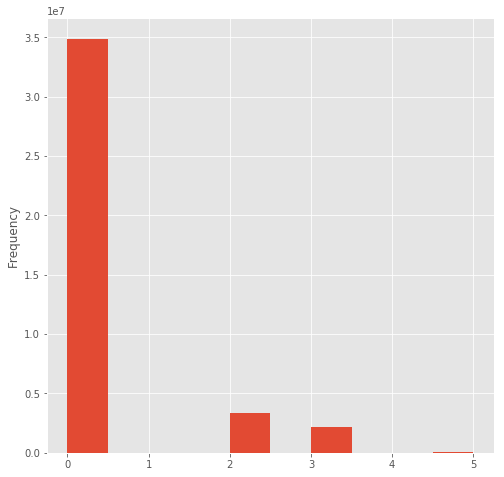

In [4]:
df.device_conn_type.plot(kind = 'hist', figsize = (8, 8))

In [22]:
df.device_conn_type.value_counts()

0    34886838
2     3317443
3     2181796
5       42890
Name: device_conn_type, dtype: int64

In [24]:
df[ ['device_conn_type', 'click'] ].groupby('device_conn_type').mean()

,click
device_conn_type,
0,0.181125
2,0.135289
3,0.044043
5,0.029611


# How does hour affect a user's likelihood to click?


In [64]:
df.loc[:,'hour']

140         14102100
409         14102100
732         14102100
1031        14102100
1470        14102100
2032        14102100
3006        14102100
3203        14102100
3471        14102100
3730        14102100
4157        14102100
4366        14102100
              ...   
40426564    14103023
40426731    14103023
40426985    14103023
40427003    14103023
40427131    14103023
40427238    14103023
40427251    14103023
40427398    14103023
40427998    14103023
40428262    14103023
40428658    14103023
40428930    14103023
Name: hour, dtype: int64

In [65]:
df.loc[:,'hour'].apply(lambda date: int(str(date)[-2:])) 


140          0
409          0
732          0
1031         0
1470         0
2032         0
3006         0
3203         0
3471         0
3730         0
4157         0
4366         0
            ..
40426564    23
40426731    23
40426985    23
40427003    23
40427131    23
40427238    23
40427251    23
40427398    23
40427998    23
40428262    23
40428658    23
40428930    23
Name: hour, dtype: int64

In [25]:
df['hour_2'] = df.hour.apply(lambda date: int(str(date)[-2:]))

In [12]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_2
140,10019396062291357594,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,ea1b004b,00b1f3a7,1,0,17264,320,50,1872,3,39,-1,23,0
409,10060581628140832147,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,5602e60e,76dc4769,1,0,15703,320,50,1722,0,35,-1,79,0
732,10104235169999919529,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,c6563308,3bd9e8e7,1,0,15701,320,50,1722,0,35,-1,79,0
1031,10148467873220265742,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,a607e6a7,7801e8d9,0f2161f8,24c3c3fe,ee1d2fbb,ee007ad3,4,0,21665,320,50,2493,3,35,-1,117,0
1470,10212029404193660367,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,af93f2d3,7a50bc97,f3776ac6,1,0,20633,320,50,2374,3,39,-1,23,0


In [29]:
df.groupby('hour_2').click.mean()


hour_2
0     0.542923
1     0.536300
2     0.494136
3     0.508248
4     0.461021
5     0.492556
6     0.492927
7     0.510452
8     0.493639
9     0.478845
10    0.479939
11    0.512928
12    0.496721
13    0.499660
14    0.499911
15    0.520498
16    0.523098
17    0.512157
18    0.501297
19    0.493354
20    0.491353
21    0.492556
22    0.474439
23    0.515002
Name: click, dtype: float64

In [17]:
df['hour_avg'] = df.groupby('hour_2').click.mean()

In [18]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_2,hour_avg
140,10019396062291357594,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,17264,320,50,1872,3,39,-1,23,0,NaN
409,10060581628140832147,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15703,320,50,1722,0,35,-1,79,0,NaN
732,10104235169999919529,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15701,320,50,1722,0,35,-1,79,0,NaN
1031,10148467873220265742,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,a607e6a7,7801e8d9,0f2161f8,24c3c3fe,...,4,0,21665,320,50,2493,3,35,-1,117,0,NaN
1470,10212029404193660367,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,af93f2d3,...,1,0,20633,320,50,2374,3,39,-1,23,0,NaN


In [21]:
df.isnull().sum().sum()

100000

In [70]:
df2 = pd.DataFrame({'index': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14','15','16','17','18','19','20','21','22','23','24'],
                      'time_of_day': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14','15','16','17','18','19','20','21','22','23','24'],
    'average_click': [0.542923, 0.536300, 0.494136, 
                      0.508248, 0.461021, 0.492556, 
                      0.492927, 0.492927, 0.510452, 
                      0.493639, 0.478845, 0.479939,
                      0.512928, 0.496721, 0.499660,
                      0.499911, 0.520498, 0.523098,
                      0.512157, 0.501297, 0.493354, 
                      0.491353, 0.492556, 0.474439,
                      0.515002]}).\
     set_index('index')
                      
                      
                      


In [71]:
df2

,average_click,time_of_day
index,,
0,0.542923,0
1,0.536300,1
2,0.494136,2
3,0.508248,3
4,0.461021,4
5,0.492556,5
6,0.492927,6
7,0.492927,7
8,0.510452,8


In [106]:
df_click_true = df[df.click==1]
print df_click_true

                            id  click  hour    C1  banner_pos   site_id  \
732       10104235169999919529      1     0  1005           0  1fbe01fe   
1470      10212029404193660367      1     0  1005           0  85f751fd   
2032      10290911054727525938      1     0  1005           0  5b08c53b   
3006       1043220994879128355      1     0  1005           1  85f751fd   
3730      10531475579981335532      1     0  1005           0  1fbe01fe   
4366      10617439638534822200      1     0  1002           0  2c4ed2f7   
5008      10704304656145826192      1     0  1005           0  f84e52b6   
5428      10759016159001877850      1     0  1005           0  1fbe01fe   
7035      10978872991614356986      1     0  1005           0  1fbe01fe   
7781       1109241584180168921      1     0  1005           0  1fbe01fe   
9281      11291490179731437373      1     0  1005           0  543a539e   
9973      11381903985522193204      1     0  1005           0  1fbe01fe   
...                      

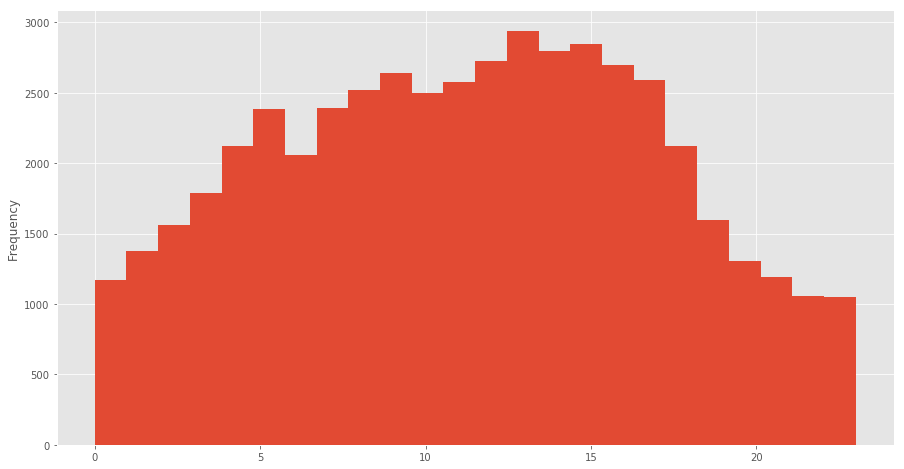

In [107]:
df_click_true.hour.plot(kind = 'hist', figsize = (15, 8), bins = 24)